# TASK-4 EMAIL SPAM DETECTION USING MACHINE LEARNING

## Introduction

Email spam detection is a crucial application of machine learning, aimed at classifying emails into two categories: 'ham' (legitimate) or 'spam' (unwanted). In this project, we will create a basic email spam detection system using machine learning techniques. The dataset consists of two columns: 'v1' (category) and 'v2' (email message). Our goal is to train a model to accurately classify emails based on their content.

## Aim of the project

The aim of this project is to develop a machine learning model that can distinguish between spam and ham emails. We will follow a step-by-step approach, including data import, cleaning, preprocessing, model training, evaluation, and visualization of results. The project will conclude with a summary of the findings and the effectiveness of the developed model.

### Step 1: Importing Libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Step 2: Loading and Exploring the Dataset


In [12]:
email = pd.read_csv('spam.csv',encoding='latin-1')
print("Dataset After Importing:")
email.head(20)

Dataset After Importing:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [10]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Step 3: Preprocessing and Feature Extraction

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email['v2'])
y = email['v1']

### Step 4: Splitting the Dataset into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Building and Training the Model

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Step 6: Evaluating the Model and Showing Results

In [7]:
y_pred = model.predict(X_test)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 97.85%


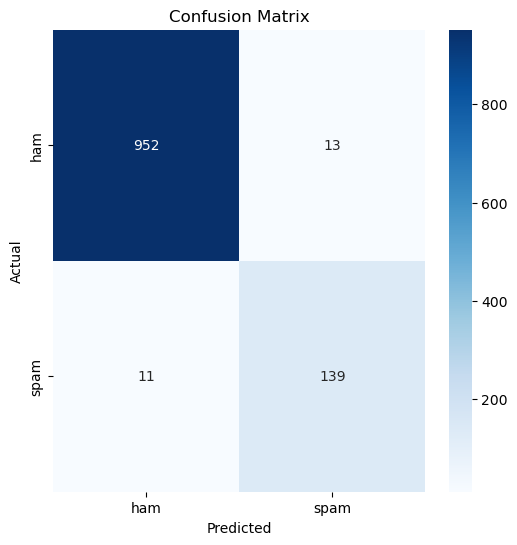

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step: 7 Testing with custom message

In [8]:
def test_email_spam_detection(model, vectorizer):
    while True:
        email_message = input("Enter an email message (or type 'exit' to quit): ")
        if email_message.lower() == 'exit':
            print("Exiting the testing section.")
            break
        input_features = vectorizer.transform([email_message])
        prediction = model.predict(input_features)
        if prediction[0] == 'ham':
            print("Prediction: This email is legitimate (ham).")
        else:
            print("Prediction: This email is spam.")
        print() 
test_email_spam_detection(model, vectorizer)

Enter an email message (or type 'exit' to quit): "Congratulations! You've won a special prize. Claim it now!"
Prediction: This email is spam.

Enter an email message (or type 'exit' to quit): "Hii Nishanth How are you"
Prediction: This email is legitimate (ham).

Enter an email message (or type 'exit' to quit): exit
Exiting the testing section.


## Conclusion:

In this project, we successfully developed a machine learning model for email spam detection. By employing the Naive Bayes classifier and utilizing a dataset containing labeled examples of spam and ham emails, the model achieved an accuracy of 97.85%. This demonstrates the effectiveness of the developed system in accurately classifying unseen emails. 